# LDA

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [3]:
# Read toronto restaurant review data
df = pd.read_csv('gs://yelp_review_toronto_restaurant/toronto_restaurant_review.csv', index_col=0)
toronto_restaurant_review = df.text

In [4]:
# Convert a collection of text documents to a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')

In [15]:
trr = vectorizer.fit_transform(toronto_restaurant_review)

In [17]:
# Fit LDA models
lda = LatentDirichletAllocation(max_iter=5, 
                                learning_method='online', learning_offset=50., 
                                random_state=0).fit(trr)

In [18]:
# Define the method to print topic words
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        message = "Topic #%d: " % topic_idx
        message += " ".join([feature_names[i]
                             for i in topic.argsort()[:-n_top_words - 1:-1]])
        print(message)
    print()

In [19]:
print_top_words(lda, vectorizer.get_feature_names(), 20)

Topic #0: came ordered menu restaurant dinner got didn meal night friend table went did time dish server experience wasn really just
Topic #1: sandwich ve best brunch place fries breakfast coffee eggs wings love great toronto time bacon french lunch day sandwiches delicious
Topic #2: pizza pasta seafood appetizer wine italian favorite totally delivery calamari oysters crust toppings pizzas octopus crowded girlfriend mussels entree fresh
Topic #3: food service time order just place wait don minutes like table people didn restaurant asked said got long bad came
Topic #4: sushi lunch salmon rolls roll fish japanese fresh free price salad sashimi quality rice good soup tuna spring 10 special
Topic #5: cheese sauce like sweet good cream bread really salad just ice tea taste delicious nice fresh cake chocolate bit flavour
Topic #6: chicken thai food curry rice spicy fish good tacos fried sauce vegetarian pad chips vegan ve burrito place indian ordered
Topic #7: place good like food bar just 

# EDA

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Distribution of Character Counts in Reviews

Text(0.5, 0, 'Number of Character Counts')

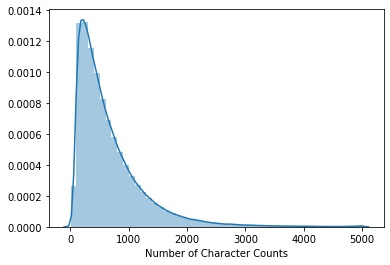

In [11]:
review_lens = [len(review) for review in df.text]
sns.distplot(review_lens)
plt.xlabel('Number of Character Counts')

### Distribution of Word Counts in Reviews

Text(0.5, 0, 'Number of Word Counts')

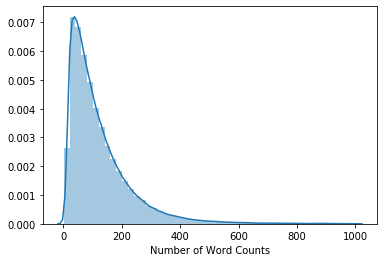

In [12]:
review_word_lens = [len(review.split()) for review in df.text]
sns.distplot(review_word_lens)
plt.xlabel('Number of Word Counts')

### Boxplot of Word Counts in Reviews

Text(0.5, 0, 'Number of Word Counts')

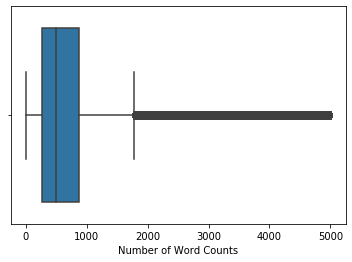

In [17]:
sns.boxplot(x=review_lens)
plt.xlabel('Number of Word Counts')

### Statistics of Word Counts in Reviews

In [14]:
print(f'Mean of Word Counts: {np.mean(review_word_lens, dtype=int)}')
print(f'Median of Word Counts: {np.median(review_word_lens)}')
print(f'STD of Word Counts: {np.std(review_word_lens, dtype=int)}')

Mean of Word Counts: 122
Median of Word Counts: 91.0
STD of Word Counts: 108


### Word Cloud

In [15]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [19]:
tmp = 'came ordered menu restaurant dinner got didn meal night friend table went did time dish server experience wasn really just'.split()

In [33]:
wordcloud = WordCloud(background_color='white').generate('came ordered menu restaurant dinner got didn meal night friend table went did time dish server experience wasn really just')

(-0.5, 399.5, 199.5, -0.5)

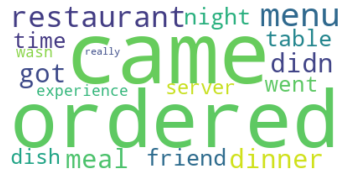

In [34]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')